# SG Population Analysis 1957 - 2018

In [17]:
# Inport all necessary libraries here
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define all the used function here
def regroup_age (x):
    if re.match(r"(0  -  4|5  -  9|10 - 14)", x):
        return '0 - 14 Years'
    elif re.match(r"(15 - 19|20 - 24)", x):
        return '15 - 24 Years'
    elif re.match(r"(25 - 29|30 - 34|35 - 39)", x):
        return '25 - 39 Years'
    elif re.match(r"(40 - 44|45 - 49|50 - 54)", x):
        return '40 - 54 Years'
    elif re.match(r"(55 - 59|60 - 64|65 - 69)", x):
        return '55 - 69 Years'
    elif re.match(r"(70 - 74|75 - 79)", x):
        return '70 - 79 Years'
    else:
        return '80 Years and Above'
    

In [3]:
sg_all_df = pd.read_csv("raw.csv")
sg_all_df.head()

,Unnamed: 0,year,ethnicity,age,population
0,0,1957,Total Residents,0 - 4 Years,264727
1,1,1957,Total Residents,5 - 9 Years,218097
2,2,1957,Total Residents,10 - 14 Years,136280
3,3,1957,Total Residents,15 - 19 Years,135679
4,4,1957,Total Residents,20 - 24 Years,119266


In [4]:
sg_all_df['ethnicity'].unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

In [5]:
sg_residents_df = sg_all_df[(sg_all_df['ethnicity'] == "Total Residents") & ~(sg_all_df['age'].str.contains('Over'))]
sg_residents_df['regroup_age'] = sg_residents_df['age'].apply(regroup_age)
sg_residents_df.to_csv("sg_residents.csv")
sg_residents_df['age'].unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years'], dtype=object)

In [15]:
total_year = []
total_age = []
total_population = []

sg_residents_df = sg_residents_df[sg_residents_df['population'].notna()]

# create array for post-processing
year_array = sg_residents_df['year'].unique()
regroup_age_array = sg_residents_df['regroup_age'].unique()

for year in year_array:
    for age in regroup_age_array:
        temp_df = sg_residents_df[(sg_residents_df['year'] == year) & (sg_residents_df['regroup_age'] == age) & (sg_residents_df['population'] != 'na')]
        population = sum(temp_df['population'].astype(int))
        
        total_year.append(year)
        total_age.append(age)
        total_population.append(population)

sg_data = {'year': total_year,
           'age group': total_age,
           'population': total_population}        
        
sg_total_residents_df=pd.DataFrame(sg_data, columns=['year', 'age group', 'population'])

sg_total_residents_df.head(10)

,year,age group,population
0,1957,0 - 14 Years,619104
1,1957,15 - 24 Years,254945
2,1957,25 - 39 Years,284360
3,1957,40 - 54 Years,194727
4,1957,55 - 69 Years,77131
5,1957,70 - 79 Years,12999
6,1957,80 Years and Above,1786
7,1958,0 - 14 Years,664500
8,1958,15 - 24 Years,259200
9,1958,25 - 39 Years,294100


In [23]:
print(sg_total_residents_df['age group'].unique())

sg_total_residents_pivot = pd.pivot_table(sg_total_residents_df, index=['year'], columns=['age group'], 
                                         values='population', aggfunc=np.sum)
sg_total_residents_pivot.reset_index(inplace=True)
sg_total_residents_pivot.columns=['year', '0 - 14 Years', '15 - 24 Years', '25 - 39 Years', '40 - 54 Years',
                                  '55 - 69 Years', '70 - 79 Years', '80 Years and Above']
sg_total_residents_pivot

['0 - 14 Years' '15 - 24 Years' '25 - 39 Years' '40 - 54 Years'
 '55 - 69 Years' '70 - 79 Years' '80 Years and Above']


,year,0 - 14 Years,15 - 24 Years,25 - 39 Years,40 - 54 Years,55 - 69 Years,70 - 79 Years,80 Years and Above
0,1957,619104,254945,284360,194727,77131,12999,1786
1,1958,664500,259200,294100,201000,83400,0,0
2,1959,705500,264600,302400,208800,88000,0,0
3,1960,747600,264200,309200,214500,91800,0,0
4,1961,780000,267400,318100,220000,97100,0,0
...,...,...,...,...,...,...,...,...
57,2014,607955,511255,859975,940059,681092,183109,48418
58,2015,602415,507029,862716,935259,717981,183842,51785
59,2016,596164,500625,867530,930226,749464,191751,53556
60,2017,594481,492045,870494,927755,768298,211447,54341


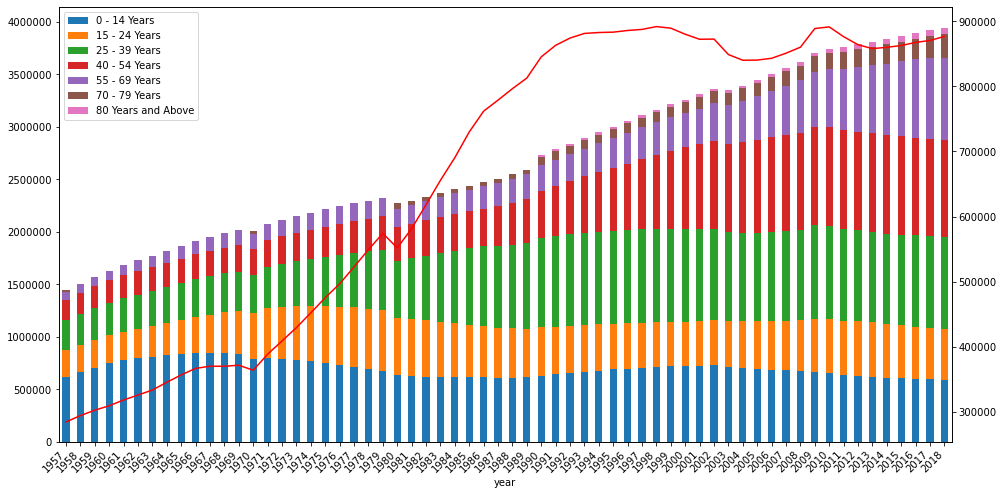

In [47]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1)
x_labels = sg_total_residents_pivot['year']
y_labels = np.arange(0, 4500000, 500000)

ax1 = sg_total_residents_pivot.plot(kind='bar', stacked=True, x='year', y=['0 - 14 Years', '15 - 24 Years', '25 - 39 Years', '40 - 54 Years',
                                  '55 - 69 Years', '70 - 79 Years', '80 Years and Above'], ax=ax1)
ax2 = sg_total_residents_pivot['25 - 39 Years'].plot(secondary_y=True, color='red', ax=ax1)
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.set_yticklabels(y_labels)

plt.show()